In [1]:
import glob
import os

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
lat_min = 30
lon_min = -80
lat_max = 80
lon_max=60

In [3]:
data_dir = '/home/soontiensn/data/gpsc-sdfo000/opp_drift_fa3/drifters/DriftTool_Sample_Dataset/datasets/nafc'
files = glob.glob(os.path.join(data_dir, '*.nc'))
files.sort()

In [4]:
etopo = xr.open_dataset('/home/soontiensn/data/ocn-nav/ETOPO1_Bed_g_gmt4.grd')
etopo = etopo.sel(x=slice(lon_min,lon_max), y=slice(lat_min,lat_max))

In [5]:
def plot_bathymetry(ax, etopo, levels=[-3000, -2000, -1000, -500, -200]):
    ax.contour(etopo.x, etopo.y, etopo.z,
               levels=levels, colors='gray',
               linewidths=0.5, transform=ccrs.PlateCarree())

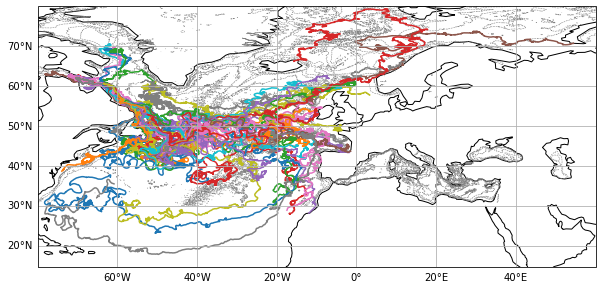

In [6]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10,10))

plot_bathymetry(ax, etopo)

for f in files:
    d = xr.open_dataset(f)
    ax.plot(d.LONGITUDE, d.LATITUDE, transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines(draw_labels=['bottom', 'left'])

# Zoom on North West Atlantic

(40.0, 70.0)

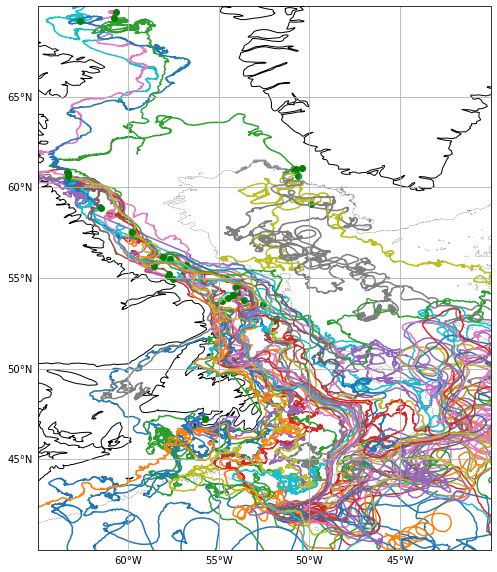

In [7]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10,10))

plot_bathymetry(ax, etopo, levels=[-3000])

for f in files:
    d = xr.open_dataset(f)
    ax.plot(d.LONGITUDE, d.LATITUDE, transform=ccrs.PlateCarree())
    ax.plot(d.LONGITUDE[0], d.LATITUDE[0], 'go', transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines(draw_labels=['bottom', 'left'])

ax.set_xlim([-65,-40])
ax.set_ylim([40,70])